In [1]:
### Question 1
# (a)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import math
from prettytable import PrettyTable

def create_dataset(n=1250, nf=2, nr=0, ni=2, random_state=125):
    '''
    generate a new dataset with 
    n: total number of samples
    nf: number of features
    nr: number of redundant features (these are linear combinatins of informative features)
    ni: number of informative features (ni + nr = nf must hold)
    random_state: set for reproducibility
    '''
    X, y = make_classification( n_samples=n,
                                n_features=nf,
                                n_redundant=nr,
                                n_informative=ni,
                                random_state=random_state,
                                n_clusters_per_class=2)
    rng = np.random.RandomState(2)
    X += 3 * rng.uniform(size = X.shape)
    X = StandardScaler().fit_transform(X)
    return X, y

In [2]:
# (b
def plotter(classifier, X, X_test, y_test, title, ax=None):
    # plot decision boundary for given classifier
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                            np.arange(y_min, y_max, plot_step)) 
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax:
        ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        ax.set_title(title)
    else:
        plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        plt.title(title)

In [3]:
def Q1_a(X, X_train, X_test, y_train, y_test):
    # split the dataset, train=0.8; test = 0.2
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=45)
    ## 1- Decision Tree Classifier: DT 
    DT_clf = DecisionTreeClassifier()
    DT_clf.fit(X_train,y_train)
    
    plt.figure(figsize=(12,12))
    plt.subplot(3,2,1)
    plotter(DT_clf, X, X_test, y_test, "Decision Tree Classifier")
    # 2- Model: Random Forest Classifier: RF
    RF_clf = RandomForestClassifier()
    RF_clf.fit(X_train,y_train)
    plt.subplot(3,2,2), plotter(RF_clf, X, X_test, y_test, title="Random Forest Classifier")
    # 3- AdaBoost Classifier: AB
    AB_clf = AdaBoostClassifier()
    AB_clf.fit(X_train,y_train)
    plt.subplot(3,2,3), plotter(AB_clf, X, X_test, y_test, title = "AdaBoost Classifier")
    # 4- Logistic Regression Classifier: LR
    LR_clf = LogisticRegression()
    LR_clf.fit(X_train,y_train)
    plt.subplot(3,2,4), plotter(LR_clf, X, X_test, y_test, title="Logistic Regression Classifier")
    # 5- Multilayer Perceptron(Neural Network) Classifier: MLP
    MLP_clf = MLPClassifier()
    MLP_clf.fit(X_train,y_train)
    plt.subplot(3,2,5), plotter(MLP_clf, X, X_test, y_test, title="Multilayer Perceptron(Neural Network) Classifier")
    # 6- Support Vector Machine Classifier: SVM
    SVM_clf = SVC()
    SVM_clf.fit(X_train,y_train)
    plt.subplot(3,2,6), plotter(SVM_clf, X, X_test, y_test, title="Support Vector Machine Classifier")
    

In [4]:
def avg_accuracy(clf, X_test, y_test):
    accuracy_list = []
    for i in range(10):
        y_predict = clf.predict(X_test)
        acc= accuracy_score(y_test, y_predict)
        accuracy_list.append(acc)
    mean_acc = np.mean(accuracy_list)
    return mean_acc


def Q1_b(X, y, X_train_a, X_test_a, y_train_a, y_test_a):  
    random_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]
    ## 1- DT, 2-  RF, 3-AB, 4-LR, 5-MLP, 6-SVM
    DT_acc_list = []
    RF_acc_list = []
    AB_acc_list = []
    LR_acc_list = []
    MLP_acc_list = []
    SVM_acc_list = []
    for r_size in random_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X_train_a, y_train_a, train_size = r_size/len(X_train_a), random_state=45)
#         print("==========", len(X_train), len(X_test_a))
        DT_clf = DecisionTreeClassifier().fit(X_train,y_train)
        RF_clf = RandomForestClassifier().fit(X_train,y_train)
        AB_clf = AdaBoostClassifier().fit(X_train,y_train)
        LR_clf = LogisticRegression().fit(X_train,y_train)
        MLP_clf = MLPClassifier().fit(X_train,y_train)
        SVM_clf = SVC().fit(X_train,y_train)
        
        acc_1 = avg_accuracy(DT_clf, X_test_a, y_test_a)
        acc_2 = avg_accuracy(RF_clf, X_test_a, y_test_a)
        acc_3 = avg_accuracy(AB_clf, X_test_a, y_test_a)
        acc_4 = avg_accuracy(LR_clf, X_test_a, y_test_a)
        acc_5 = avg_accuracy(MLP_clf, X_test_a, y_test_a)
        acc_6 = avg_accuracy(SVM_clf, X_test_a, y_test_a)

        DT_acc_list.append(acc_1)
        RF_acc_list.append(acc_2)
        AB_acc_list.append(acc_3)
        LR_acc_list.append(acc_4)
        MLP_acc_list.append(acc_5)
        SVM_acc_list.append(acc_6)
    # random_sizes =1000 
    DT_clf = DecisionTreeClassifier().fit(X_train_a,y_train_a)
    RF_clf = RandomForestClassifier().fit(X_train_a,y_train_a)
    AB_clf = AdaBoostClassifier().fit(X_train_a,y_train_a)
    LR_clf = LogisticRegression().fit(X_train_a,y_train_a)
    MLP_clf = MLPClassifier().fit(X_train_a,y_train_a)
    SVM_clf = SVC().fit(X_train_a,y_train_a)
    
    acc_1 = avg_accuracy(DT_clf, X_test_a, y_test_a)
    acc_2 = avg_accuracy(RF_clf, X_test_a, y_test_a)
    acc_3 = avg_accuracy(AB_clf, X_test_a, y_test_a)
    acc_4 = avg_accuracy(LR_clf, X_test_a, y_test_a)
    acc_5 = avg_accuracy(MLP_clf, X_test_a, y_test_a)
    acc_6 = avg_accuracy(SVM_clf, X_test_a, y_test_a)
    
    DT_acc_list.append(acc_1)
    RF_acc_list.append(acc_2)
    AB_acc_list.append(acc_3)
    LR_acc_list.append(acc_4)
    MLP_acc_list.append(acc_5)
    SVM_acc_list.append(acc_6)
    
    random_sizes.append(1000)
    
    x = range(len(random_sizes))
    plt.figure(figsize=(9,6))
    plt.title("Question1_b")
    plt.plot(x, DT_acc_list, color='blue', label="Decision Tree")
    plt.plot(x, RF_acc_list, color='Orange', label="Random Forest")
    plt.plot(x, AB_acc_list, color='Lime', label="AdaBoost")
    plt.plot(x, LR_acc_list, color='Red', label="Logistic Regression")
    plt.plot(x, MLP_acc_list, color='DarkRed', label="Neural Network")
    plt.plot(x, SVM_acc_list, color='Chocolate', label="SVM")
    plt.legend()
    plt.grid(alpha=0.4,linestyle=':')
    plt.xlabel("train data size")
    plt.xticks(x, random_sizes, rotation=0)
    plt.ylabel("average accuracy")
    plt.show()


In [5]:
def Q1_c(X, y, X_train_a, X_test_a, y_train_a, y_test_a):
    X_train_a = np.concatenate((X_train_a,[[-1.2076264, 1.20688728]]))
    y_train_a = np.concatenate((y_train_a, [1]))
    random_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900,1000]
    ## 1- DT, 2-  RF, 3-AB, 4-LR, 5-MLP, 6-SVM
    DT_acc_time = []
    RF_acc_time = []
    AB_acc_time = []
    LR_acc_time = []
    MLP_acc_time = []
    SVM_acc_time = []
    for r_size in random_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X_train_a, y_train_a, train_size = r_size/len(X_train_a), random_state=45)
        
        start_1 = time.time()
        DT_clf = DecisionTreeClassifier().fit(X_train,y_train)
        acc_1 = avg_accuracy(DT_clf, X_test, y_test)
        end_1 = time.time()
        time_1 = math.log(end_1 - start_1)
        
        start_2 = time.time()
        RF_clf = RandomForestClassifier().fit(X_train,y_train)
        acc_2 = avg_accuracy(RF_clf, X_test, y_test)
        end_2 = time.time()
        time_2 = math.log(end_2 - start_2)
        
        start_3 = time.time()
        AB_clf = AdaBoostClassifier().fit(X_train,y_train)
        acc_3 = avg_accuracy(AB_clf, X_test, y_test)
        end_3 = time.time()
        time_3 = math.log(end_3 - start_3)

        start_4 = time.time()
        LR_clf = LogisticRegression().fit(X_train,y_train)
        acc_4 = avg_accuracy(LR_clf, X_test, y_test)
        end_4 = time.time()
        time_4 = math.log(end_4 - start_4)
        
        start_5 = time.time()
        MLP_clf = MLPClassifier().fit(X_train,y_train)
        acc_5 = avg_accuracy(MLP_clf, X_test, y_test)
        end_5 = time.time()
        time_5 = math.log(end_5 - start_5)
        
        start_6 = time.time()
        SVM_clf = SVC().fit(X_train,y_train)
        acc_6 = avg_accuracy(SVM_clf, X_test, y_test)
        end_6 = time.time()
        time_6 = math.log(end_6 - start_6)
        
        DT_acc_time.append(time_1)
        RF_acc_time.append(time_2)
        AB_acc_time.append(time_3)
        LR_acc_time.append(time_4)
        MLP_acc_time.append(time_5)
        SVM_acc_time.append(time_6)
    x = range(len(random_sizes))
    plt.figure(figsize=(9,6))
    plt.title("Question1_c")
    plt.plot(x, DT_acc_time, color='blue', label="Decision Tree")
    plt.plot(x, RF_acc_time, color='Orange', label="Random Forest")
    plt.plot(x, AB_acc_time, color='Lime', label="AdaBoost")
    plt.plot(x, LR_acc_time, color='Red', label="Logistic Regression")
    plt.plot(x, MLP_acc_time, color='DarkRed', label="Neural Network")
    plt.plot(x, SVM_acc_time, color='Chocolate', label="SVM")
    # Show Legend
    plt.legend()
    plt.grid(alpha=0.4,linestyle=':')
    plt.xlabel("train data size")
    plt.xticks(x, random_sizes, rotation=0)
    plt.ylabel("Log of time")
    plt.show()

In [6]:
def Q1_d(X_train_d, X_test_d, y_train_d, y_test_d ):
    DT_clf = DecisionTreeClassifier(random_state=0).fit(X_train_d, y_train_d)
    
    y_predict_train = DT_clf.predict(X_train_d)
    acc_train = accuracy_score(y_train_d , y_predict_train)
    print(f"The train accuracy of the Decision Tree model is {acc_train:.3f} .")
    
    y_predict_test = DT_clf.predict(X_test_d)
    acc_test = accuracy_score(y_test_d , y_predict_test)
    print(f"The test accuracy of the Decision Tree model is {acc_test:.3f} .")

In [7]:
def Q1_e(X_train_d, X_test_d, y_train_d, y_test_d):
    #min_sample_leaf = range(2,131)
    train_auc = []
    test_auc = []
    for k in range(2,131):
        
        DT_clf = DecisionTreeClassifier(min_samples_leaf = k, random_state=0)
        DT_clf.fit(X_train_d, y_train_d)
        
        y_predict_train = DT_clf.predict_proba(X_train_d)[:,1]
#         y_predict_train = y_predict_train.max(axis=1)
        
        y_train_auc = metrics.roc_auc_score(y_train_d, y_predict_train)
        train_auc.append(y_train_auc)
        
        y_predict_test = DT_clf.predict_proba(X_test_d)[:,1]
#         y_predict_test = y_predict_test.max(axis=1)
        
        y_test_auc = metrics.roc_auc_score(y_test_d, y_predict_test)
        test_auc.append(y_test_auc)
    
    min_sample_leaf_range = range(2, 131)
    
    min_size = [10, 20, 30,50, 80 ,100, 120]
    plt.figure(figsize=(15,10))
    plt.title("Question1_e")
    plt.plot(min_sample_leaf_range, train_auc, color='blue', label="Train datasets")
    plt.plot(min_sample_leaf_range, test_auc, color='Red', label="Test datasets")
    plt.legend()
    plt.grid(alpha=0.4,linestyle=':')
    plt.xlabel("min_samples_leaf")
    plt.xticks(min_sample_leaf_range, min_sample_leaf_range, rotation=45)
    plt.ylabel("AUC score")
    plt.show()
    

    

In [8]:
def Q1_f_10_cross_validation(X_train_d, X_test_d, y_train_d, y_test_d):
    auc_dict = {}
    for k in range(2,96):
        auc_dict[k]=[] 
        for i in range(10):
            # 1 fold serve as test_data
            X_test = X_train_d[i*100: (i+1)*100]
            y_test = y_train_d[i*100: (i+1)*100]
            
            # rest 9 folds serve as train_data
            X_train_1 = X_train_d[0: i*100]
            X_train_2 = X_train_d[(i+1)*100: len(X_train_d)]
            X_train = np.concatenate((X_train_1,X_train_2))
            # generate: y_train
            y_train_1 = y_train_d[0: i*100]
            y_train_2 = y_train_d[(i+1)*100: len(X_train_d)]
            y_train = np.concatenate((y_train_1,y_train_2))
            
            DT_clf = DecisionTreeClassifier(min_samples_leaf = k, random_state=0)
            DT_clf.fit(X_train, y_train)
            y_predict = DT_clf.predict_proba(X_test)[:,1]
#             y_predict =y_predict.max(axis=1)
            auc_score = metrics.roc_auc_score(y_test, y_predict)
            auc_dict[k].append(auc_score)
    k_list = []
    auc_list=[]
    for item in auc_dict.keys():
        k_list.append(item)
    for item in auc_dict.values():
        auc_list.append(item)
    x= range(2,96)
    plt.figure(figsize=(15,10))
    plt.title("Question1_f_10_crossValidation")
    plt.boxplot(auc_list)
    plt.grid(alpha=0.4,linestyle=':')
    plt.xlabel("min_samples_leaf")
    plt.xticks(x, x, rotation=45)
    plt.ylabel("AUC score")
    plt.show()
    
    # let the min_samples_leaf = 24, can get highest CV score
    DT_clf = DecisionTreeClassifier(min_samples_leaf = 24, random_state=0)
    DT_clf.fit(X_train_d, y_train_d)
    
    y_predict_test = DT_clf.predict(X_test_d)
    acc_test = accuracy_score(y_test_d, y_predict_test)
    
    y_predic_train = DT_clf.predict(X_train_d)
    acc_train = accuracy_score(y_train_d, y_predic_train)
    
    print(f"Train accuacy = {acc_train:.3f}.")
    print(f"Test accuracy = {acc_test:.3f}.")

In [9]:
def Q1_g_GridSearchCV(X_train_d, X_test_d, y_train_d, y_test_d):
    params={'min_samples_leaf': [x for x in range(2,96)]}
    DT_clf = DecisionTreeClassifier(random_state=0)
    grid = GridSearchCV(DT_clf, params, cv=10, scoring="roc_auc")
    grid.fit(X_train_d, y_train_d)
    print("The optimal min_samples_leaf chosen by GridSearchCV is ", grid.best_params_)
    
    DT_clf_g = DecisionTreeClassifier(min_samples_leaf = 28, random_state=0)
    DT_clf_g.fit(X_train_d, y_train_d)
    
    y_predict_test = DT_clf_g.predict(X_test_d)
    acc_test = accuracy_score(y_test_d, y_predict_test)
    
    y_predic_train = DT_clf_g.predict(X_train_d)
    acc_train = accuracy_score(y_train_d, y_predic_train)
    
    print(f"Train accuacy = {acc_train:.3f}.")
    print(f"Test accuracy = {acc_test:.3f}.")

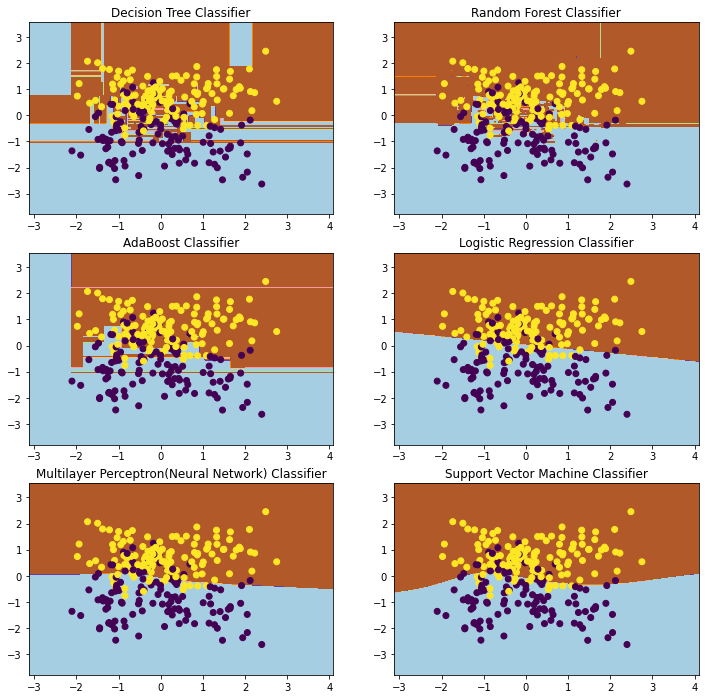

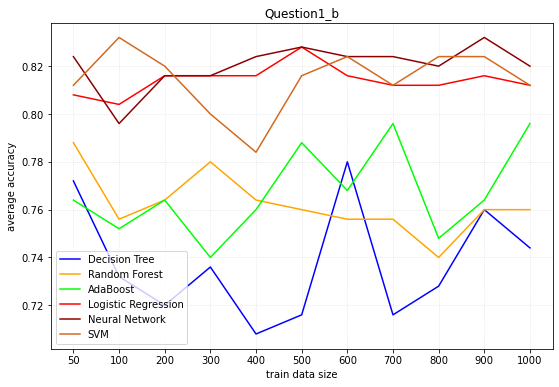

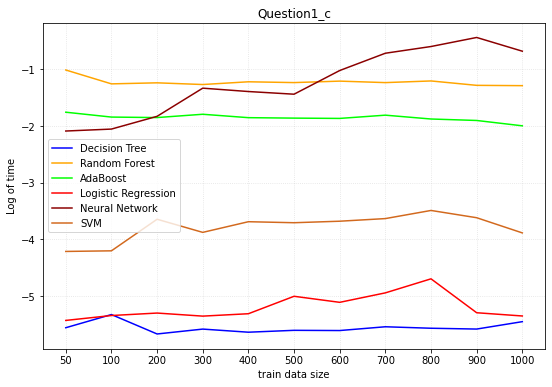

-------------------Q1_d_------------------------
The train accuracy of the Decision Tree model is 1.000 .
The test accuracy of the Decision Tree model is 0.814 .
------------------------------------------------



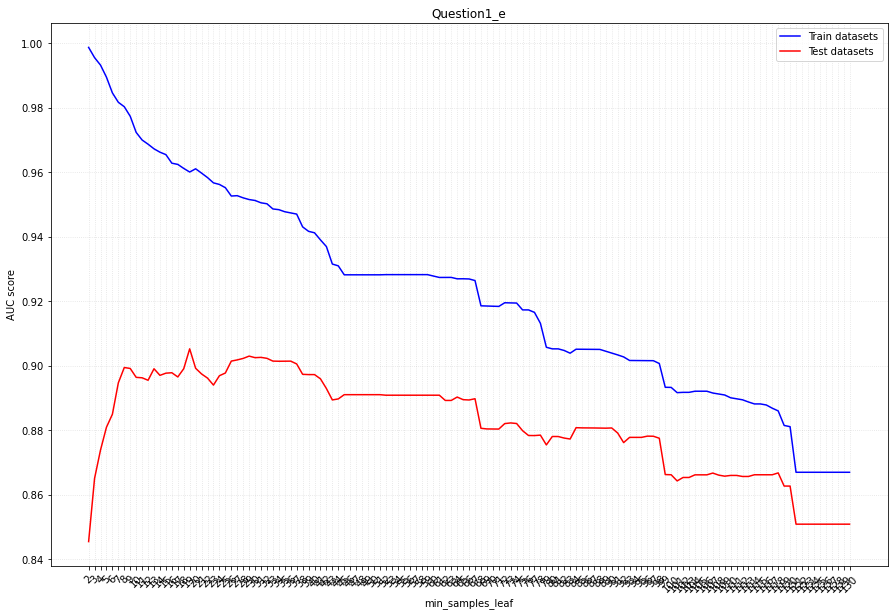

-------------------Q1_f_------------------------


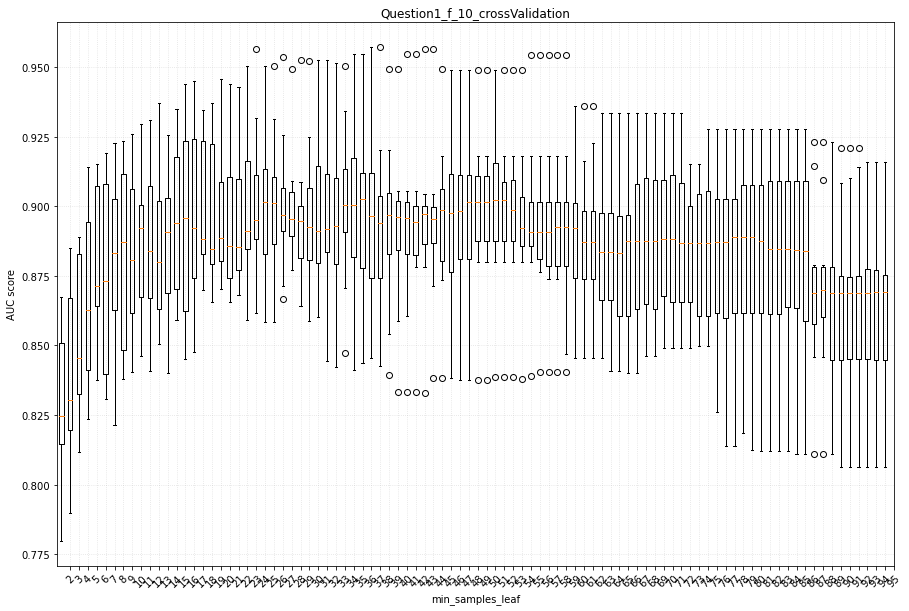

Train accuacy = 0.881.
Test accuracy = 0.825.
------------------------------------------------

-------------------Q1_g_------------------------
The optimal min_samples_leaf chosen by GridSearchCV is  {'min_samples_leaf': 28}
Train accuacy = 0.878.
Test accuracy = 0.828.
------------------------------------------------



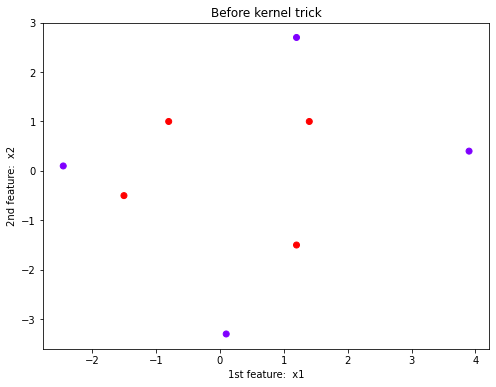

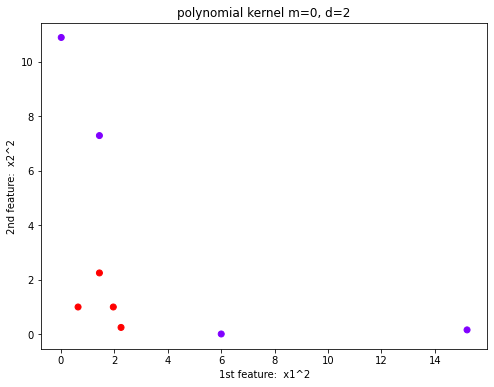

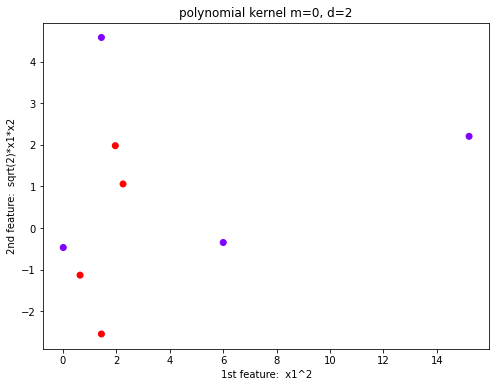

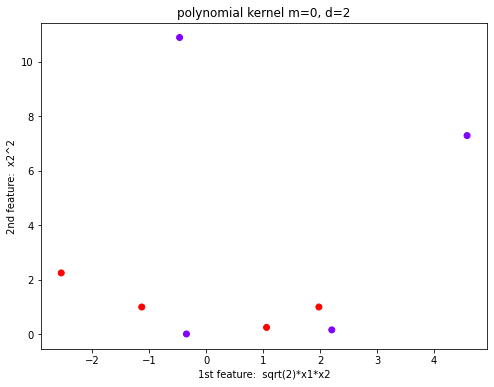

-------------------Q2_c_------------------------
The final weight vector is [ 3.         -0.62       -0.654       0.07793276].

+-------------------------+--------------------+-----------------------+---------------------+-----------------------+
| Iter_No. of each update |         w0         |           w1          |          w2         |           w3          |
+-------------------------+--------------------+-----------------------+---------------------+-----------------------+
|            0            |        1.0         |          1.0          |         1.0         |          1.0          |
|            1            |        0.8         |         -2.042        |        0.968        |   0.5587653685395944  |
|            2            |        1.0         |         -1.65         |        1.168        |   0.954745166004061   |
|            3            |        0.8         |         -1.652        |        -1.01        |   1.0480832611206854  |
|            4            |        1.0 

In [36]:
def Question2_a_b_plot(X, y, title, feature1, feature2):
    X = np.array(X)
    y= np.array(y)
    fig = plt.figure(figsize=(8,6))
    
    plt.scatter(X[:,0], X[:,1], marker='o', c=y, cmap='rainbow')#画散点图
    plt.title(title)#设置标题
    plt.xlabel(f"1st feature:  {feature1}")#设置x轴标签
    plt.ylabel(f"2nd feature:  {feature2}")#设置y轴标签
    plt.show()#显示所画的图

def Question2_a_b1(X, y):
    X = np.array(X)
    y= np.array(y)
    Question2_a_b_plot(X, y, title="Before kernel trick", feature1 = "x1", feature2 ="x2")
    x1 = X[:,0]
    x2 = X[:,1]
    X_b1 = X
    X_b1[:,0] = x1*x1
    X_b1[:,1] = x2*x2
    Question2_a_b_plot(X_b1, y, title="polynomial kernel m=0, d=2", feature1 = "x1^2", feature2 ="x2^2")
    
    
def Question2_b2(X,y):
    X = np.array(X)
    y= np.array(y)
    x1 = X[:,0]
    x2 = X[:,1]
    X_b2 = X
    X_b2[:,1] = pow(2,0.5)*x1*x2
    X_b2[:,0] = x1*x1
    Question2_a_b_plot(X_b2, y, title="polynomial kernel m=0, d=2", feature1 = "x1^2", feature2 ="sqrt(2)*x1*x2")
    
    
def Question2_b3(X,y):
    X = np.array(X)
    y= np.array(y)
    x1 = X[:,0]
    x2 = X[:,1]
    X_b3 = X
    X_b3[:,0] = pow(2,0.5)*x1*x2
    X_b3[:,1] = x2*x2
    Question2_a_b_plot(X_b3, y, title="polynomial kernel m=0, d=2", feature1 = "sqrt(2)*x1*x2", feature2 ="x2^2")
    

def Question2_c(X, y):
    column = np.array([0, 0, 0, 0, 0, 0, 0, 0])
    X = np.column_stack((X, column))
    x1 = X[:, 0]
    x2 = X[:, 1]
    X[:, 2] = pow(2, 0.5) * x1 * x2
    X[:, 0] = x1 * x1
    X[:, 1] = x2 * x2
    w = np.array([1, 1, 1, 1], dtype='float64')
    
    m = 1
    iteration = []
    iteration.append(0)
    iteration_total = []
    n = 1
    iteration_total.append(0)
    weights = np.array([[1, 1, 1, 1]], dtype='float64')
    weight_total = np.array([[1, 1, 1, 1]], dtype='float64')
    converged = 0
    while converged == 0:
        converged = 1
        for i in range(8):
            w0 = w[0]
            w1 = w[1]
            w2 = w[2]
            w3 = w[3]
            y_ = w0 + w1 * X[:, 0][i] + w2 * X[:, 1][i] + w3 * X[:, 2][i]
            signal = y_ * y[i]
            if signal <= 0:
                w[0] = w0 + (y[i] * 0.2 * 1)
                w[1] = w1 + (y[i] * 0.2 * X[:, 0][i])
                w[2] = w2 + (y[i] * 0.2 * X[:, 1][i])
                w[3] = w3 + (y[i] * 0.2 * X[:, 2][i])
                converged = 0
                iteration.append(m)
                weight_total = np.concatenate((weight_total, [w]))
                m = m + 1
            iteration_total.append(n)
            weights = np.concatenate((weights, [w]))
            n = n + 1

    print(f"The final weight vector is {w}.\n")

    t = PrettyTable(['Iter_No. of each update', 'w0', 'w1', 'w2', 'w3'])
    for i in range(len(iteration)):
        t.add_row([iteration[i], weight_total[i][0], weight_total[i][1], weight_total[i][2], weight_total[i][3]])
    print(t)

    t_2 = PrettyTable(['Total iteration', 'w0', 'w1', 'w2', 'w3'])
    for i in range(len(iteration_total)):
        t_2.add_row([iteration_total[i], weights[i][0], weights[i][1], weights[i][2], weights[i][3]])
    print(t_2)


def main():
    #Question1
    X, y = create_dataset()
    # split the dataset, train=0.8; test = 0.2
    X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, train_size=0.8, random_state=45)
    
    Q1_a(X, X_train_a, X_test_a, y_train_a, y_test_a)
    Q1_b(X, y, X_train_a, X_test_a, y_train_a, y_test_a)
    Q1_c(X, y, X_train_a, X_test_a, y_train_a, y_test_a)
    
    # Q1_d - g: focus on the DecisionTrreeClassifier
    X_d , y_d = create_dataset(n=2000, nf=20, nr=12, ni=8, random_state=25)
    X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d , y_d ,train_size=0.5, random_state=15)

    print("-------------------Q1_d_------------------------")
    Q1_d(X_train_d, X_test_d, y_train_d, y_test_d)
    print("------------------------------------------------\n")
    Q1_e(X_train_d, X_test_d, y_train_d, y_test_d)
    
    print("-------------------Q1_f_------------------------")
    Q1_f_10_cross_validation(X_train_d, X_test_d, y_train_d, y_test_d)
    print("------------------------------------------------\n")

    print("-------------------Q1_g_------------------------")
    Q1_g_GridSearchCV(X_train_d, X_test_d, y_train_d, y_test_d)
    print("------------------------------------------------\n")


    #Question2
    X_q2 = [[-0.8, 1],
            [3.9, 0.4],
            [1.4, 1],
            [0.1, -3.3],
            [1.2, 2.7],
            [-2.45, 0.1],
            [-1.5, -0.5],
            [1.2, -1.5]]
    y_q2= [1,-1,1,-1,-1,-1,1,1]
    
    Question2_a_b1(X_q2,y_q2)
    Question2_b2(X_q2,y_q2)
    Question2_b3(X_q2,y_q2)
    print("-------------------Q2_c_------------------------")
    Question2_c(X_q2, y_q2)


if __name__ == "__main__":
    main()
